In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tda_digits import *

# Extraction of topological features from a handwritten digits

Load the image:

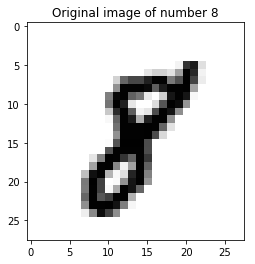

In [3]:
image = get_image(n=17, show=True)

Produce the binary image B by thresholding the input image:

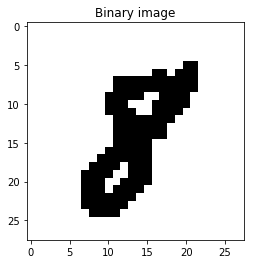

In [4]:
binary_image = get_binary_image(image, show=True)

Reduce the binary image to 1 pixel width to expose its topology using the Zhang-Suen Thinning algorithm:

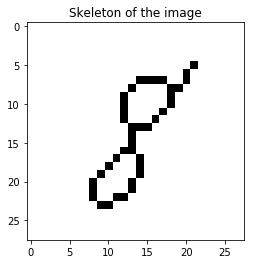

In [5]:
skeleton = get_skeleton(binary_image, show=True)

Transform the pixels of skeleton to points in the plane:

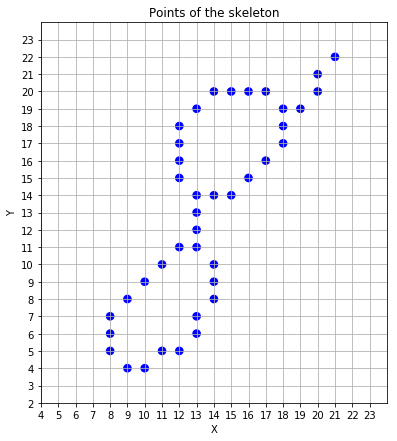

In [6]:
points = get_points(skeleton, sweep_direction='top', show=True)

Construct an embedded graph G in the plane where we treat the points as vertices and add edges between adjacent points similar to [1] and then remove all cycles of length 3. Intuitively, we connect the points while trying not to create new topological features.

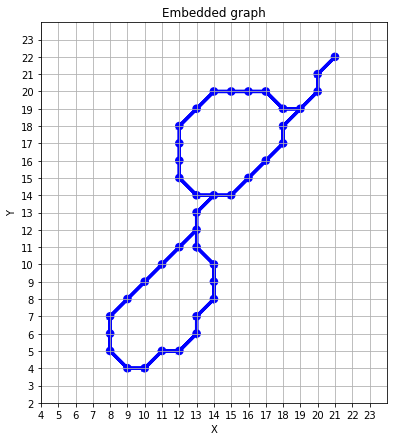

In [7]:
point_list = PointList(points)
emb_graph = point_list.get_emb_graph(show=True)

Construct a simplex stream for computing the persistent homology using the filtration on the vertices of the graph G. Filtration is the following. We are adding the vertices and edges of the embedded graph G as we sweep across the plane in sweep_direction. In this example, we sweep across the plane from $y = -\inf$ to $y = \inf$:

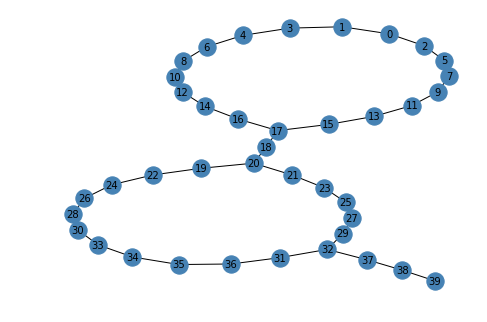

In [8]:
simplices = get_simplices(emb_graph, show=True)

Compute the persistent homology given the simplex stream to get the so-called Betti barcodes.

*Betti $k$ barcode* is a finite set of intervals. Each interval represents the first filtration level where the topological feature of dimension $k$ appears and the filtration level where it disappears. This are called birth and death times of the topological feature. 

A connected component (connected cluster of points) is 0 dimensional and a cycle (loop) is 1 dimensional feature. 

In [9]:
intervals = get_betti_barcodes(simplices, show=True)

Betti 0
(4.0, inf)

Betti 1
(12.0, inf)
(20.0, inf)



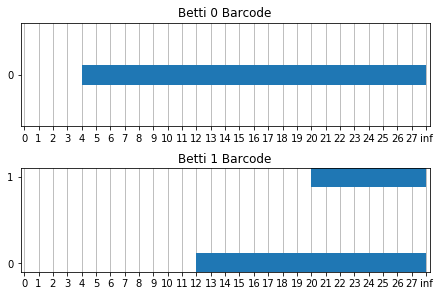

In [10]:
draw_betti_barcodes(intervals, image_size, show=True)

We note that the Betti 0 barcode (the upper picture) clearly shows the single connected component with the birth time of 4.

The Betti 1 barcode shows two lines with birth times 12 and 20 corresponding to the births of 2 cycles (the value of y when the loop closes) in the drawing of number 8 when we sweep in $y$ direction across the plane from $y = -\inf$ to $y = \inf$.

Extract 4 features:
$$
        	\sum_i { x_i (y_i - x_i) } \\
        	\sum_i { (y_{\text{max}} - y_i) (y_i - x_i) } \\
        	\sum_i { x_i^2 \cdot (y_i - x_i)^4 } \\
        	\sum_i { (y_{\text{max}} - y_i)^2 (y_i - x_i)^4 }
$$
From each Betti barcode intervals:
$$
        (x1, y1), (x2, y2), ..., (x_n, y_n)
$$

In [11]:
extract_features(intervals[0])

[96.0, 0.0, 5308416.0, 0.0]

In [12]:
extract_features(intervals[1])

[352.0, 0.0, 11075584.0, 0.0]

There are 4 sweep directions: top, bottom, right, left. We compute 2 barcodes for 0 and 1 dimension with 4 features each. All together 32 features per image of a handwritten digit:
$$
4 \text{ sweeps } \cdot 2 \text{ barcodes } \cdot 4 \text{ features } = 32 \text{ features }
$$

In [13]:
all_features = extract_all_features(n=17)
print(len(all_features))

32


In [14]:
all_features

[184.0,
 28.0,
 10242304.0,
 3136.0,
 367.0,
 0.0,
 9898057.0,
 0.0,
 184.0,
 28.0,
 10242304.0,
 3136.0,
 367.0,
 0.0,
 9898057.0,
 0.0,
 96.0,
 0.0,
 5308416.0,
 0.0,
 352.0,
 0.0,
 11075584.0,
 0.0,
 129.0,
 38.0,
 6996809.0,
 5776.0,
 311.0,
 0.0,
 7860161.0,
 0.0]